In [1]:
import pandas as pd
import os
wd = os.getcwd()
path = wd + '/Downloads/MTA_BUS_Dataset.csv'
df = pd.read_csv(path)
df.head()

,Date,Subways,Buses,LIRR,Metro-North,ScheduledTrips,Traffic
0,2020-03-01,2214601,984900,NaN,NaN,19922,786960.6125
1,2020-03-02,5347055,2209100,NaN,NaN,30340,874619.9500
2,2020-03-03,5498556,2228600,NaN,NaN,32768,882175.1750
3,2020-03-04,5515945,2177200,NaN,NaN,34304,905558.4000
4,2020-03-05,5513656,2244500,NaN,NaN,33211,929298.0375


In [2]:
import findspark
findspark.init()
import pyspark as spark
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from pyspark import SparkContext, SQLContext
sc = SparkContext()
s = SQLContext(sc)
data = s.read.options(header=True).csv(path)
data.createOrReplaceTempView("data")
data.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Subways: string (nullable = true)
 |-- Buses: string (nullable = true)
 |-- LIRR: string (nullable = true)
 |-- Metro-North: string (nullable = true)
 |-- ScheduledTrips: string (nullable = true)
 |-- Traffic: string (nullable = true)



In [3]:
mta = s.sql("""
    SELECT MONTH(Date) AS month, SUM(Subways) AS subway_users
    FROM data
    GROUP BY MONTH(Date)""")

In [4]:
display(mta)

DataFrame[month: int, subway_users: double]

In [5]:
mta = mta.toPandas()

In [6]:
display(mta)

,month,subway_users
0,12,43539931.0
1,6,23969478.0
2,3,73825807.0
3,5,15299308.0
4,9,42867559.0
5,4,11750151.0
6,8,35265638.0
7,7,32565457.0
8,10,48033239.0
9,11,43696314.0


<IPython.core.display.Javascript object>


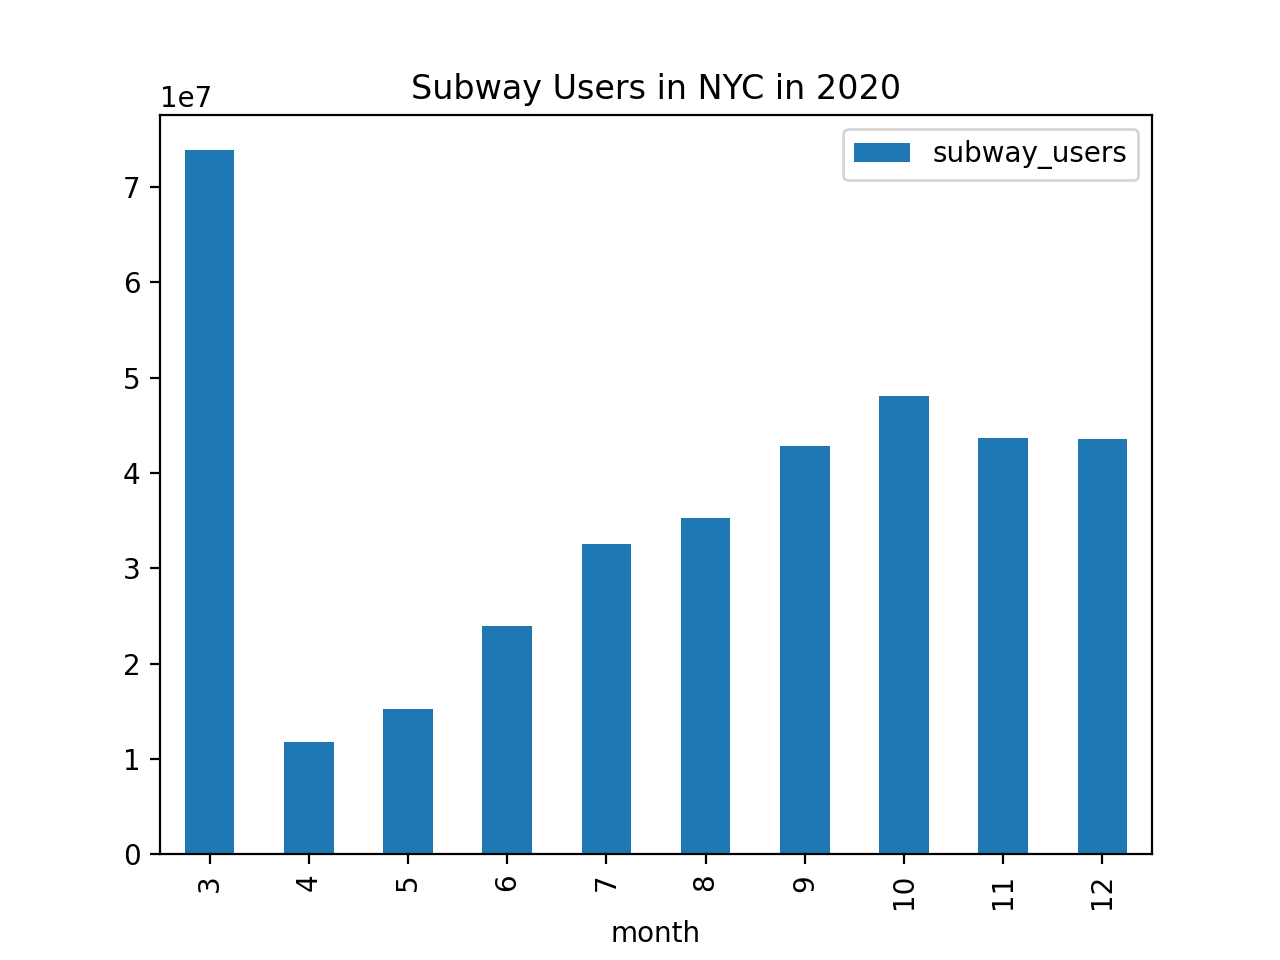

In [7]:
mta1 = mta.sort_values('month')
mta1.plot(kind='bar',title='Subway Users in NYC in 2020',x='month',y= 'subway_users')
plt.show()

<IPython.core.display.Javascript object>


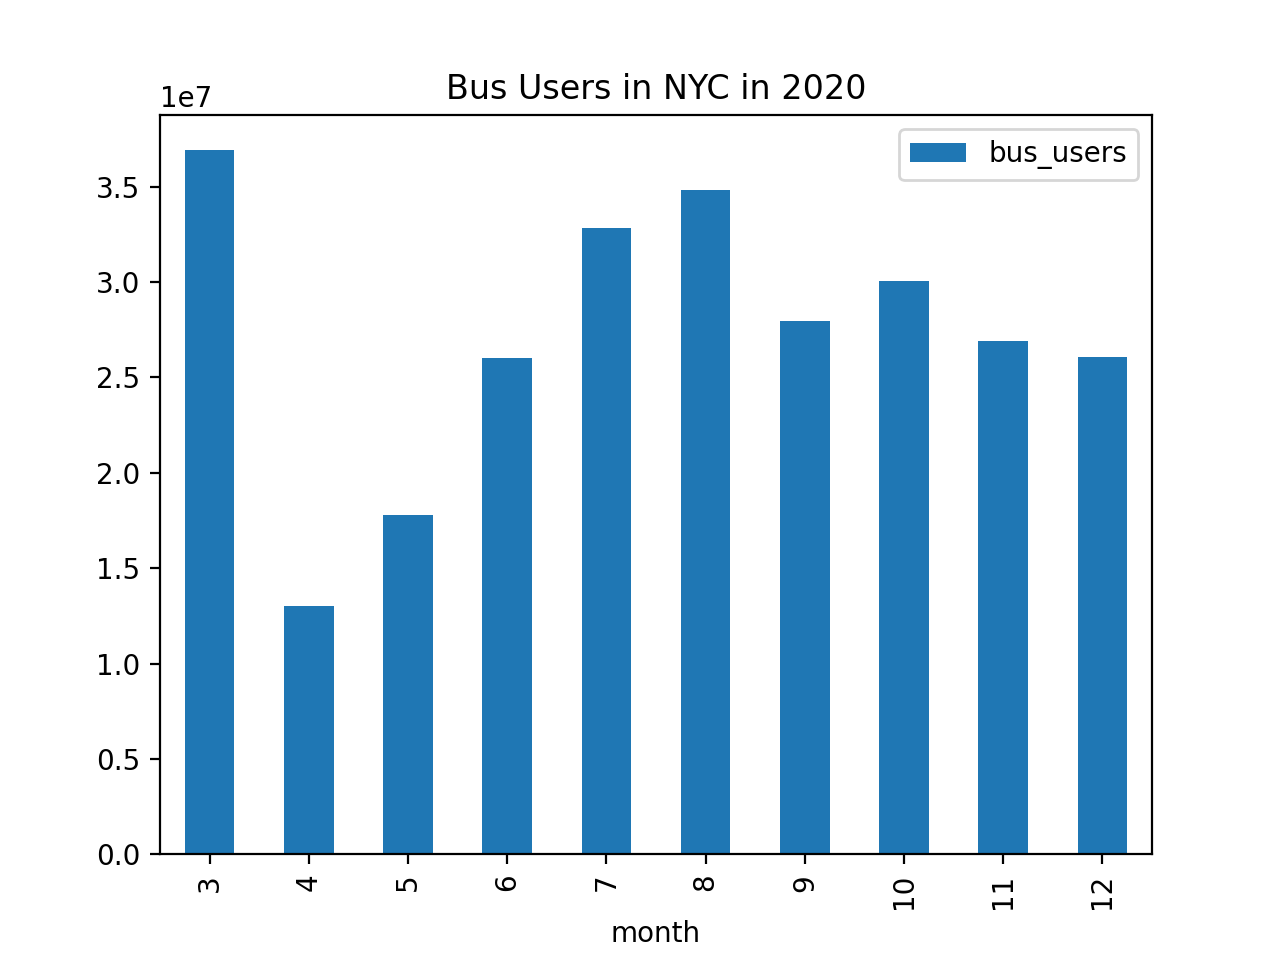

In [8]:
bus = s.sql("""
    SELECT MONTH(Date) AS month, SUM(Buses) AS bus_users
    FROM data
    GROUP BY MONTH(Date)""")
bus = bus.toPandas()
bus1 = bus.sort_values('month')
bus1.plot(kind='bar',title='Bus Users in NYC in 2020',x='month',y= 'bus_users')
plt.show()

<IPython.core.display.Javascript object>


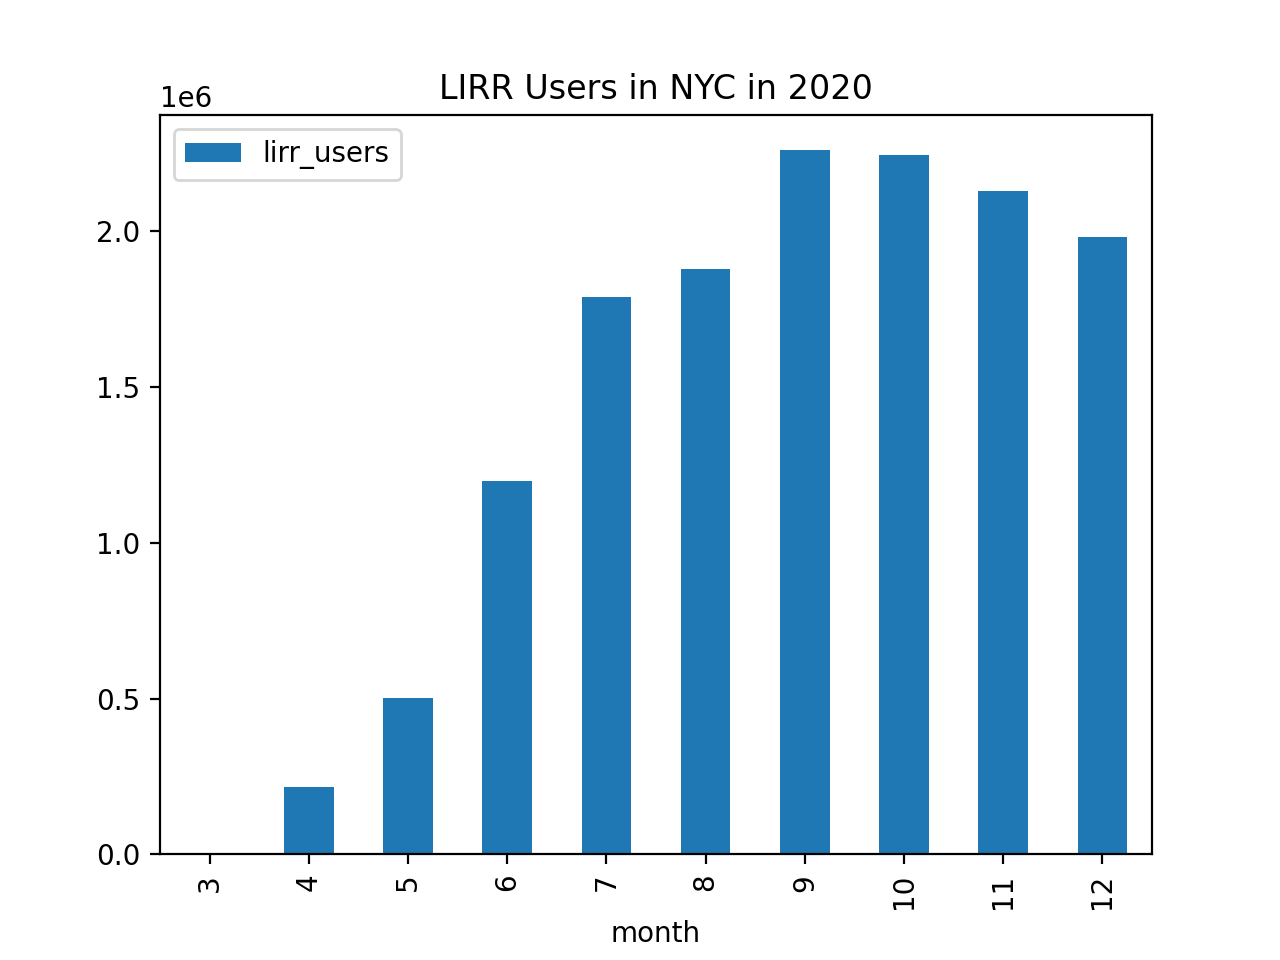

In [9]:
lirr = s.sql("""
    SELECT MONTH(Date) AS month, SUM(LIRR) AS lirr_users
    FROM data
    GROUP BY MONTH(Date)""")
lirr = lirr.toPandas()
lirr1 = lirr.sort_values('month')
lirr1.plot(kind='bar',title='LIRR Users in NYC in 2020',x='month',y= 'lirr_users')
plt.show()

<IPython.core.display.Javascript object>


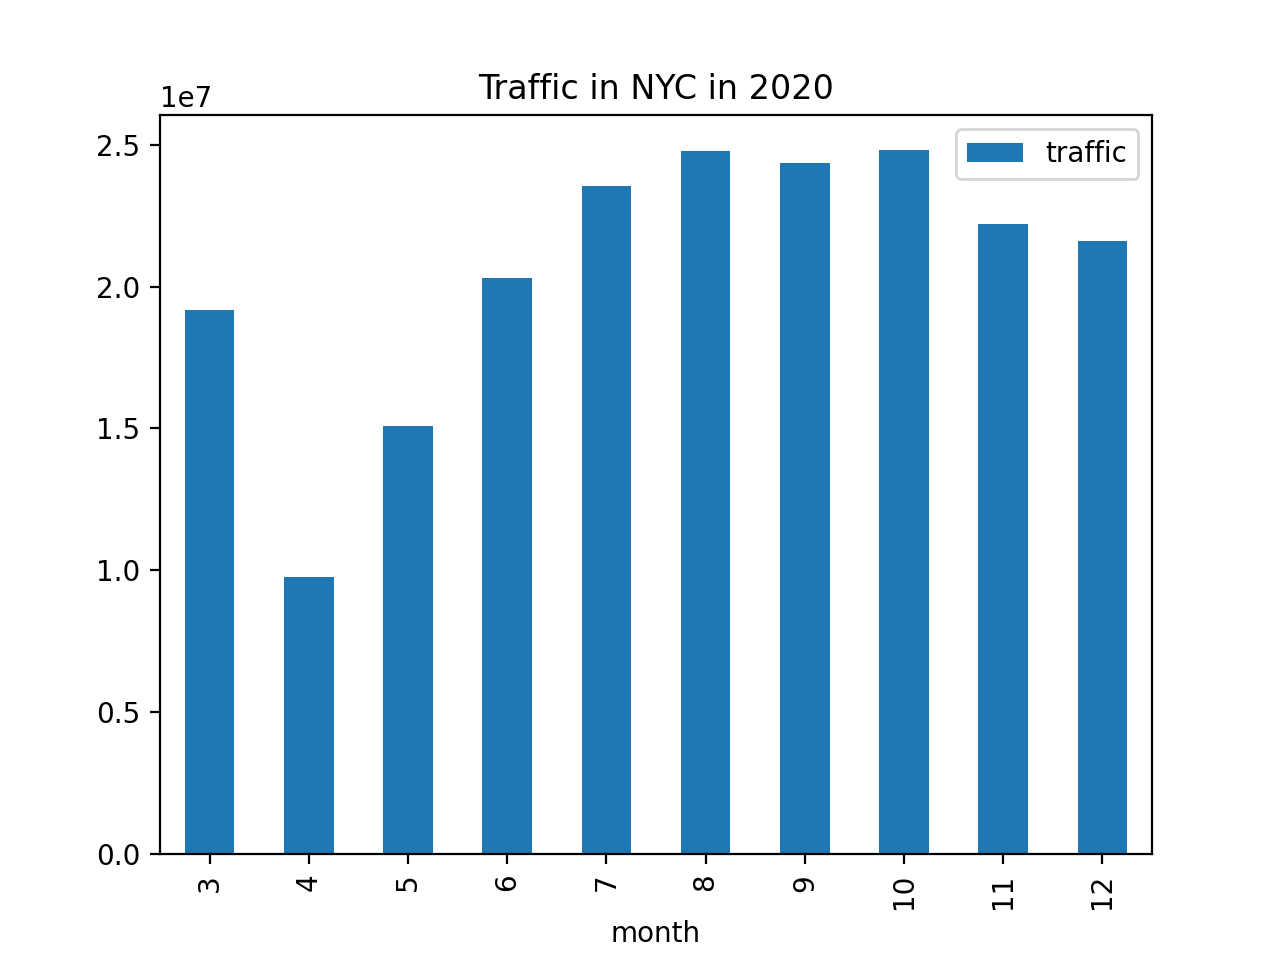

In [10]:
traf = s.sql("""
    SELECT MONTH(Date) AS month, SUM(Traffic) AS traffic
    FROM data
    GROUP BY MONTH(Date)""")
traf = traf.toPandas()
traf1 = traf.sort_values('month')
traf1.plot(kind='bar',title='Traffic in NYC in 2020',x='month',y= 'traffic')
plt.show()